# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [13]:
# Import packages
import pandas as pd

 # Seaborn / matplotlib for graphs
import seaborn as sns
# Ensure plots are displayed inline in the notebook
%matplotlib inline

from matplotlib import pyplot as plt

# Read the file
df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

In [3]:
# Your code to explore the data
df_flights.tail()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
271935,2013,9,20,5,VX,13204,Orlando International,Orlando,FL,12892,Los Angeles International,Los Angeles,CA,1730,1,0.0,1945,18,1,0
271936,2013,4,19,5,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,11697,Fort Lauderdale-Hollywood International,Fort Lauderdale,FL,1020,24,1.0,1218,61,1,0
271937,2013,10,26,6,WN,12191,William P Hobby,Houston,TX,10821,Baltimore/Washington International Thurgood Ma...,Baltimore,MD,1540,30,1.0,1935,15,1,0
271938,2013,5,7,2,HA,13830,Kahului Airport,Kahului,HI,12173,Honolulu International,Honolulu,HI,609,-5,0.0,641,-6,0,0
271939,2013,6,11,2,UA,14771,San Francisco International,San Francisco,CA,14100,Philadelphia International,Philadelphia,PA,1338,60,1.0,2200,40,1,0


In [4]:
# size of the dataset
df_flights.size

5438800

In [7]:
## 1)   Missing values
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [9]:
df_flights[df_flights.isnull().any(axis=1)]

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
171,2013,4,18,4,DL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,13930,Chicago O'Hare International,Chicago,IL,835,0,NaN,945,0,1,1
359,2013,5,22,3,OO,11433,Detroit Metro Wayne County,Detroit,MI,13930,Chicago O'Hare International,Chicago,IL,1719,0,NaN,1738,0,1,1
429,2013,7,3,3,MQ,13851,Will Rogers World,Oklahoma City,OK,13930,Chicago O'Hare International,Chicago,IL,1935,0,NaN,2125,0,1,1
545,2013,4,13,6,FL,14524,Richmond International,Richmond,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,630,0,NaN,809,0,1,1
554,2013,5,8,3,EV,12953,LaGuardia,New York,NY,11193,Cincinnati/Northern Kentucky International,Cincinnati,OH,1320,0,NaN,1524,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271410,2013,8,5,1,WN,14831,Norman Y. Mineta San Jose International,San Jose,CA,10800,Bob Hope,Burbank,CA,1525,0,NaN,1625,0,1,1
271607,2013,6,18,2,EV,14100,Philadelphia International,Philadelphia,PA,13244,Memphis International,Memphis,TN,600,0,NaN,729,0,1,1
271634,2013,5,8,3,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,14100,Philadelphia International,Philadelphia,PA,1325,0,NaN,1745,0,1,1
271671,2013,10,8,2,WN,12892,Los Angeles International,Los Angeles,CA,12889,McCarran International,Las Vegas,NV,1440,0,NaN,1540,0,1,1


In [10]:
df_flights.DepDel15 = df_flights.DepDel15.fillna(df_flights.DepDel15.mean())

df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00



<ipython-input-2-a2d9531f62d3>:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


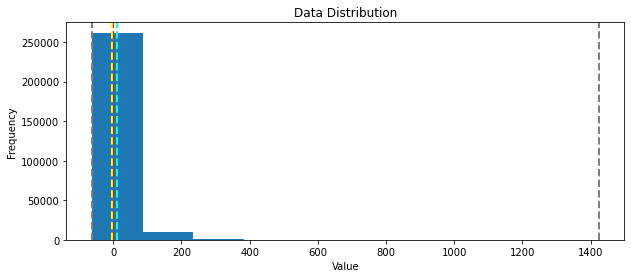

In [2]:
## 2) Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.

# Get the variable to examine
var = df_flights['DepDelay']

# Get statistics
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        med_val,
                                                                                        mod_val,
                                                                                        max_val))

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var)

# Add lines for the statistics
plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()

<ipython-input-3-5b01860c55f7>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


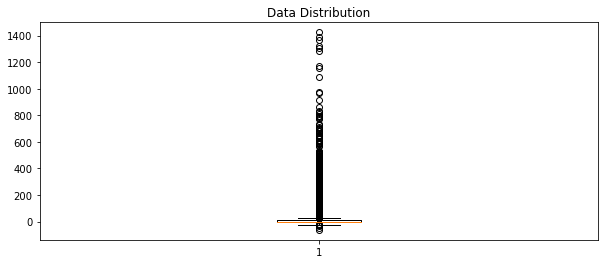

In [3]:
# Get the variable to examine
var = df_flights['DepDelay']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.boxplot(var)

# Add titles and labels
plt.title('Data Distribution')

# Show the figure
fig.show()

Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00



<ipython-input-4-177296d3280f>:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


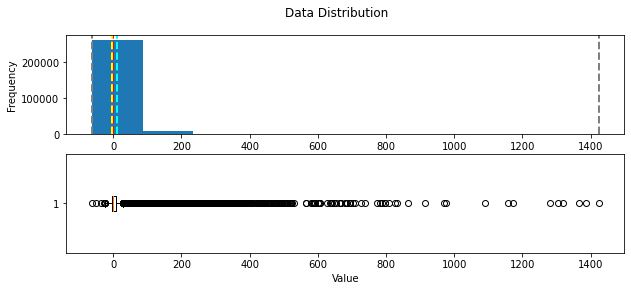

In [4]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

# Get the variable to examine
col = df_flights['DepDelay']
# Call the function
show_distribution(col)

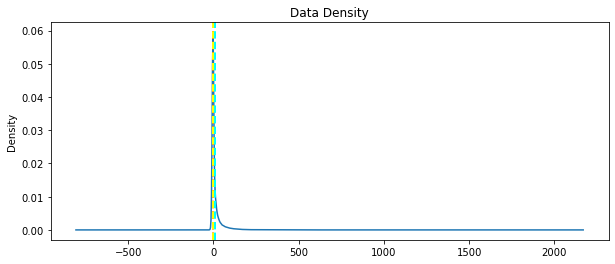

In [5]:
def show_density(var_data):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of Grade
col = df_flights['DepDelay']
show_density(col)

Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



<ipython-input-4-177296d3280f>:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


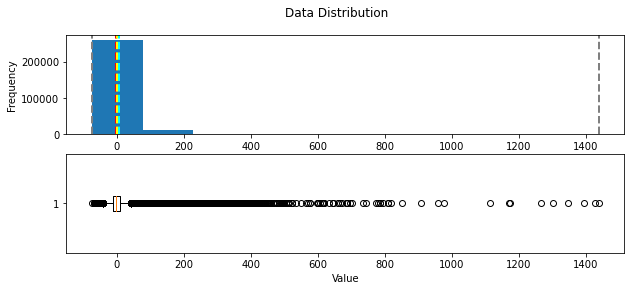

In [6]:
## Let examine the another variable

# Get the variable to examine
col = df_flights['ArrDelay']
# Call the function
show_distribution(col)

In [8]:
# Drop outliers
    # First we will calculate IQR
Q1 = df_flights[['ArrDelay', 'DepDelay']].quantile(0.25)
Q3 = df_flights[['ArrDelay', 'DepDelay']].quantile(0.75)
IQR = Q3-Q1
print(IQR)

ArrDelay    21.0
DepDelay    13.0
dtype: float64


In [9]:
 # First we select only numerical variables
  # We select the numerical columns
columns = ['ArrDelay', 'DepDelay']

    # Set to NaN those which are outliers
df_flights[columns] = df_flights[columns][~((df_flights[columns]<(Q1-1.5*IQR))|(df_flights[columns]>(Q3+1.5*IQR))).any(axis=1)]

In [10]:
    # Drop NaN
dataset_without_na = df_flights.dropna()

    # Check the results...
dataset_without_na.shape

(232306, 20)

In [11]:
# Dataset shape with outliers
df_flights.shape

(271940, 20)

In [12]:
# Part 2: 
# First we select only numerical variables
df_flights.select_dtypes(include=['float64', 'int64']).columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'OriginAirportID',
       'DestAirportID', 'CRSDepTime', 'DepDelay', 'DepDel15', 'CRSArrTime',
       'ArrDelay', 'ArrDel15', 'Cancelled'],
      dtype='object')

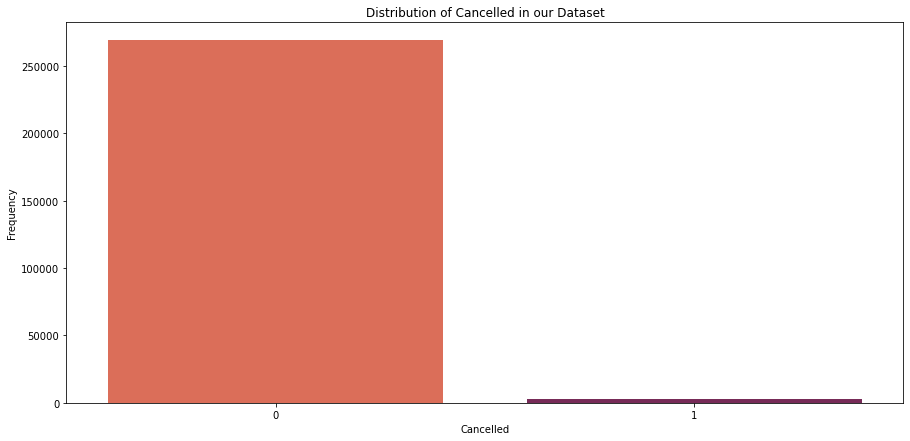

In [18]:
# First we create a dataset with the loan_status variables
loan = df_flights['Cancelled'].value_counts()
loan = loan.to_frame()
loan.reset_index(inplace=True)

    # We set the name columns
loan.columns = ['Cancelled', 'Count']

    # Set the heigth and width size
plt.subplots(figsize=(15, 7))

    # Plot with seaborn
sns.barplot(y='Count', x='Cancelled', data=loan, palette='rocket_r');

    # Labels
plt.xlabel("Cancelled");
plt.ylabel("Frequency");
plt.title("Distribution of Cancelled in our Dataset");

Minimum:-42.00
Mean:-4.08
Median:-5.00
Mode:-7.00
Maximum:41.00



<ipython-input-4-177296d3280f>:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


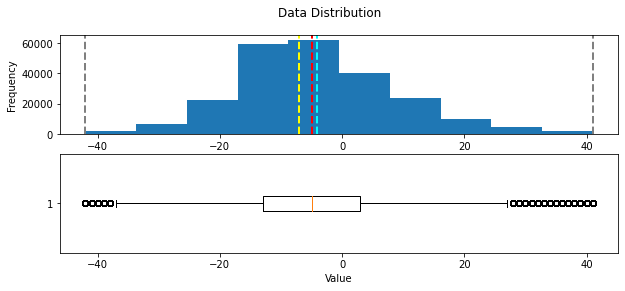

In [20]:
## Let examine the another variable

# Get the variable to examine
col = dataset_without_na['ArrDelay']
# Call the function
show_distribution(col)

Minimum:-23.00
Mean:0.38
Median:-2.00
Mode:-3.00
Maximum:28.00



<ipython-input-4-177296d3280f>:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


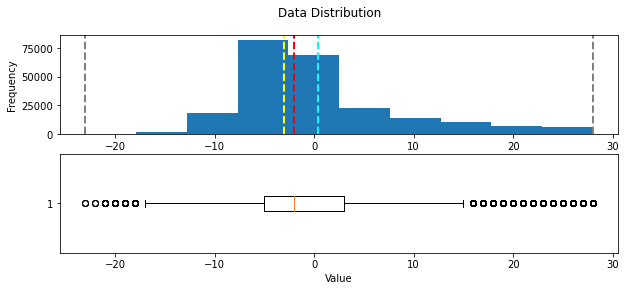

In [21]:
## Let examine the another variable

# Get the variable to examine
col = dataset_without_na['DepDelay']
# Call the function
show_distribution(col)

In [34]:
arrdelay_carrier = dataset_without_na.groupby('Carrier')['ArrDelay'].mean()

arrdelay_carrier.head()

arrdelay_carrier = pd.DataFrame(arrdelay_carrier).reset_index()
arrdelay_carrier.columns = ['Carrier', 'Avg_ArrDelay']
arrdelay_carrier

,Carrier,Avg_ArrDelay
0,9E,-7.215125
1,AA,-5.074289
2,AS,-3.898087
3,B6,-5.140185
4,DL,-5.901822
5,EV,-6.135182
6,F9,0.643092
7,FL,-2.738287
8,HA,-2.421953
9,MQ,-3.094747


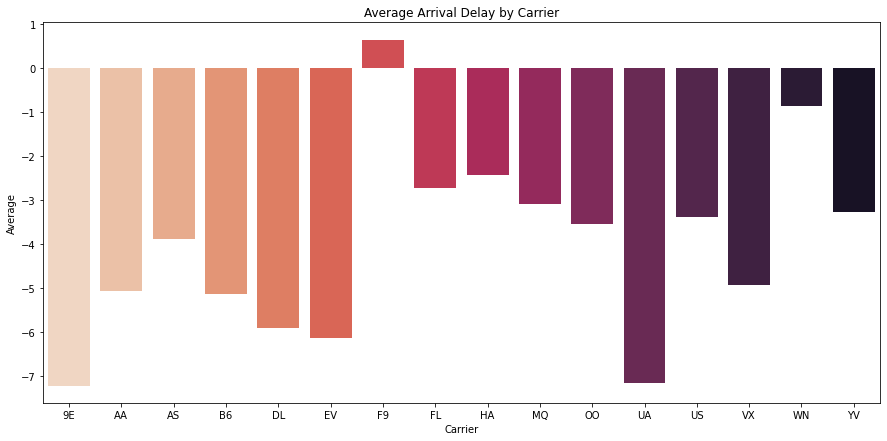

In [35]:


# Set the heigth and width size
plt.subplots(figsize=(15, 7))

    # Plot with seaborn
sns.barplot(y='Avg_ArrDelay', x='Carrier', data=arrdelay_carrier, palette='rocket_r');

    # Labels
plt.xlabel("Carrier");
plt.ylabel("Average");
plt.title("Average Arrival Delay by Carrier");

In [36]:
## 3) arrival delay by days of week

arrdelay_carrier = dataset_without_na.groupby('DayOfWeek')['ArrDelay'].mean()

arrdelay_carrier.head()

arrdelay_carrier = pd.DataFrame(arrdelay_carrier).reset_index()
arrdelay_carrier.columns = ['DayOfWeek', 'Avg_ArrDelay']
arrdelay_carrier

,DayOfWeek,Avg_ArrDelay
0,1,-3.921515
1,2,-4.817294
2,3,-3.807193
3,4,-2.718740
4,5,-3.313465
5,6,-5.587733
6,7,-4.612356


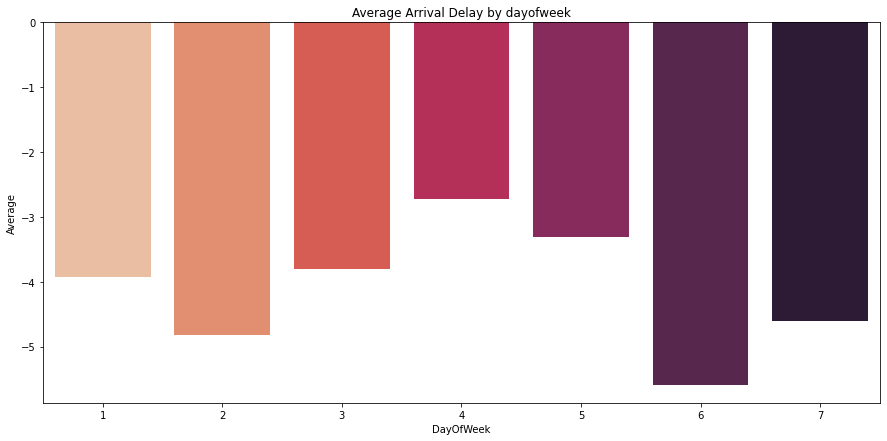

In [37]:
# Set the heigth and width size
plt.subplots(figsize=(15, 7))

    # Plot with seaborn
sns.barplot(y='Avg_ArrDelay', x='DayOfWeek', data=arrdelay_carrier, palette='rocket_r');

    # Labels
plt.xlabel("DayOfWeek");
plt.ylabel("Average");
plt.title("Average Arrival Delay by dayofweek");

In [54]:
## 4) which departure airport has the highest departure delay

depdelay_carrier = dataset_without_na.groupby('OriginAirportName')['DepDelay'].mean()

depdelay_carrier.head()
depdelay_carrier = pd.DataFrame(depdelay_carrier).reset_index()
depdelay_carrier.columns = ['DepartureAirport', 'Avg_DepDelay']
depdelay_carrier.sort_values(by='Avg_DepDelay', ascending=False)

,DepartureAirport,Avg_DepDelay
7,Chicago Midway International,5.025379
11,Dallas Love Field,4.159649
69,William P Hobby,3.770774
13,Denver International,2.811637
2,Baltimore/Washington International Thurgood Ma...,2.655023
...,...,...
25,Kahului Airport,-2.587097
66,Tucson International,-2.602970
54,Richmond International,-2.752239
64,Ted Stevens Anchorage International,-2.988555


<AxesSubplot:title={'center':'ArrDelay'}, xlabel='DepDel15'>

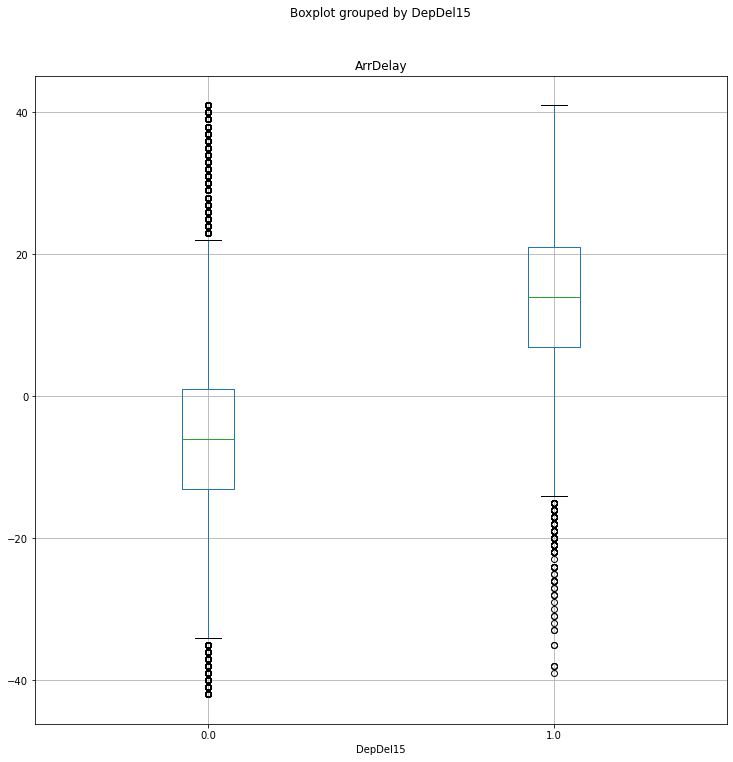

In [56]:
dataset_without_na.boxplot(column='ArrDelay', by='DepDel15', figsize=(12,12))

In [57]:
# Add a routes column
routes  = pd.Series(dataset_without_na['OriginAirportName'] + ' > ' + dataset_without_na['DestAirportName'])
dataset_without_na = pd.concat([dataset_without_na, routes.rename("Route")], axis=1)

# Group by routes
route_group = dataset_without_na.groupby(dataset_without_na.Route)
pd.DataFrame(route_group['ArrDel15'].sum()).sort_values('ArrDel15', ascending=False)

,ArrDel15
Route,
San Francisco International > Los Angeles International,82
Los Angeles International > San Francisco International,82
LaGuardia > Hartsfield-Jackson Atlanta International,69
Los Angeles International > John F. Kennedy International,66
McCarran International > Los Angeles International,64
...,...
McCarran International > Memphis International,0
McCarran International > Raleigh-Durham International,0
Seattle/Tacoma International > Austin - Bergstrom International,0


In [58]:
pd.DataFrame(route_group['ArrDelay'].mean()).sort_values('ArrDelay', ascending=False)

,ArrDelay
Route,
Louis Armstrong New Orleans International > Ronald Reagan Washington National,25.333333
Cleveland-Hopkins International > Palm Beach International,18.000000
Denver International > Raleigh-Durham International,13.826087
Palm Beach International > Pittsburgh International,10.000000
Charlotte Douglas International > General Mitchell International,10.000000
...,...
Cleveland-Hopkins International > Will Rogers World,-21.875000
Eppley Airfield > LaGuardia,-22.200000
Jacksonville International > Chicago Midway International,-22.727273
